In [34]:
import datetime as dt
import os
import subprocess 
import numpy as np
import pandas as pd

#to get financial data
from pandas_datareader import data as pdr

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline
#visualization with seaborn
import seaborn as sns


In [75]:
tickers = ['GOOG', 'NKLA', 'FB', 'AAPL']

In [82]:
weights = np.array([.25, .25, .35, .15])

In [83]:
initial_investment = 1000000

In [78]:
df = pdr.DataReader(tickers, 'yahoo', '2020-06-03',  dt.date.today())['Close']
df.head()

Symbols,GOOG,NKLA,FB,AAPL
Date,,,,
2020-06-03,1436.380005,33.970001,230.160004,325.119995
2020-06-04,1412.180054,33.750000,226.289993,322.320007
2020-06-05,1438.390015,35.970001,230.770004,331.500000
2020-06-08,1446.609985,73.269997,231.399994,333.459991
2020-06-09,1456.160034,79.730003,238.669998,343.989990


In [79]:
df.reset_index().head()

Symbols,Date,GOOG,NKLA,FB,AAPL
0,2020-06-03,1436.380005,33.970001,230.160004,325.119995
1,2020-06-04,1412.180054,33.750000,226.289993,322.320007
2,2020-06-05,1438.390015,35.970001,230.770004,331.500000
3,2020-06-08,1446.609985,73.269997,231.399994,333.459991
4,2020-06-09,1456.160034,79.730003,238.669998,343.989990


In [80]:
df_melt = df.reset_index().melt(id_vars='Date')
df_melt.head(3)

,Date,Symbols,value
0,2020-06-03,GOOG,1436.380005
1,2020-06-04,GOOG,1412.180054
2,2020-06-05,GOOG,1438.390015


Text(0.5, 20.80000000000002, 'Date')

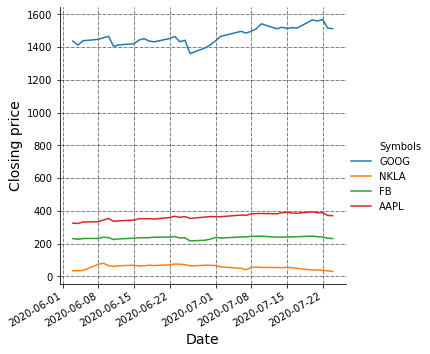

In [81]:
sns.relplot(x='Date', y='value', kind='line', hue ='Symbols',data=df_melt).fig.autofmt_xdate()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.title('', fontsize=16)
plt.ylabel('Closing price', fontsize=14)
plt.xlabel('Date', fontsize=14)

In [89]:
#Returns computation 
returns = df.pct_change()
returns.head()

Symbols,GOOG,NKLA,FB,AAPL
Date,,,,
2020-06-03,NaN,NaN,NaN,NaN
2020-06-04,-0.016848,-0.006476,-0.016814,-0.008612
2020-06-05,0.018560,0.065778,0.019798,0.028481
2020-06-08,0.005715,1.036975,0.002730,0.005912
2020-06-09,0.006602,0.088167,0.031417,0.031578


In [98]:
cov_matrix = returns.cov()
cov_matrix

Symbols,GOOG,NKLA,FB,AAPL
Symbols,,,,
GOOG,0.000349,0.000269,0.000377,0.000291
NKLA,0.000269,0.041089,0.000704,0.000536
FB,0.000377,0.000704,0.000587,0.000340
AAPL,0.000291,0.000536,0.000340,0.000372


In [91]:
returns.var()

Symbols
GOOG    0.000349
NKLA    0.041089
FB      0.000587
AAPL    0.000372
dtype: float64

# expected return of each stock

In [93]:
returns.mean()

Symbols
GOOG    0.001596
NKLA    0.010630
FB      0.000358
AAPL    0.003815
dtype: float64

In [94]:
avg_returns = returns.mean()

# expected portfolio return

In [95]:
avg_returns.dot(weights)

0.003753853143471974

In [96]:
avg_return_port = avg_returns.dot(weights)

# standard deviation of portfolio

In [99]:
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
port_stdev 

0.05468640424068048

# expected return on initial investment

In [104]:
investment_return = (1 + avg_return_port)* initial_investment

In [105]:
investment_sd = initial_investment * port_stdev

# Var Calculation

In [110]:
from scipy.stats import norm
confidence_level = 0.05
cutoff1 = norm.ppf(confidence_level, investment_return, investment_sd)

In [111]:
var1 = initial_investment - cutoff1

With 95% confidence level, the portfolio of 1M will not exceed losses greater than 86.2k over a one day period

In [113]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var1 * np.sqrt(x),2)))


1 day VaR @ 95% confidence: 86197.28
2 day VaR @ 95% confidence: 121901.36
3 day VaR @ 95% confidence: 149298.06
4 day VaR @ 95% confidence: 172394.55
5 day VaR @ 95% confidence: 192742.97
6 day VaR @ 95% confidence: 211139.35
7 day VaR @ 95% confidence: 228056.56
8 day VaR @ 95% confidence: 243802.72
9 day VaR @ 95% confidence: 258591.83
10 day VaR @ 95% confidence: 272579.72
11 day VaR @ 95% confidence: 285884.03
12 day VaR @ 95% confidence: 298596.13
13 day VaR @ 95% confidence: 310788.7
14 day VaR @ 95% confidence: 322520.68
15 day VaR @ 95% confidence: 333840.62
